In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
contentdf = pd.read_csv('Content.csv')

In [3]:
reactiontypedf = pd.read_csv('ReactionTypes.csv')

In [4]:
reactionsdf = pd.read_csv('Reactions.csv')

#### We have been given very clear cleaning instructions by our stakeholders


* We have to remove rows that have values which are missing
* Check and correct datatypes of columns
* Filter all dataframes to ONLY needed columns

## Accessing the Contentdf Dataframe

In [5]:
contentdf.head()
#accessing programmatically

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [6]:
contentdf.shape

(1000, 6)

In [7]:
contentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [8]:
contentdf.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [9]:
contentdf.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [10]:
contentdf.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [11]:
#looping to find empty columns
for column in contentdf.columns:
    if contentdf[column].isna().sum() == 0:
        print(f'There are no missing values in "{column}" ')
    else:
        print(f"There are {contentdf[column].isna().sum()} missing columns in '{column}'")

There are no missing values in "Unnamed: 0" 
There are no missing values in "Content ID" 
There are no missing values in "User ID" 
There are no missing values in "Type" 
There are no missing values in "Category" 
There are 199 missing columns in 'URL'


In [12]:
contentdf.sample(5)
#summoning random columns

,Unnamed: 0,Content ID,User ID,Type,Category,URL
797,797,c3d1c36d-2ad9-45ce-be49-51c103351e62,0873e9a7-234a-4096-a92a-8dc7a03eb0c5,video,travel,https://socialbuzz.cdn.com/content/storage/c3d...
294,294,25948d39-4549-4ead-be71-6a571bd56fe1,7a85fbc6-253f-4552-9f4a-c1a332e14fa5,audio,science,https://socialbuzz.cdn.com/content/storage/259...
289,289,e96d9fcb-b5be-4382-b809-6315dbe6f89a,241d5c6e-06c7-491b-b23e-f8d6ddc0240a,photo,tennis,https://socialbuzz.cdn.com/content/storage/e96...
562,562,d95a7e4c-d504-4cba-9bcc-4c4b1bfb06d0,0f21b6d6-7be6-484c-9698-d851ad7d43c5,audio,technology,https://socialbuzz.cdn.com/content/storage/d95...
292,292,760e026f-8373-4aa4-acb5-03eb102fc733,f02267ef-8974-43f5-9a2f-03d2c8ec22ca,audio,food,https://socialbuzz.cdn.com/content/storage/760...


In [13]:
contentdf

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [14]:
contentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


##### From these we can derive the following cleaning needs: 

* The URL column has empty missing values that need be cleaned.
* Unnamed, URL, UserID columns should definitely be dropped as they aren't relevant to us.
* Index to be increased by +1

## Cleaning contentdf

In [15]:
contentdf.dropna(subset=['URL'], inplace=True)

In [16]:
contentdf.info()
#Taking away 199 empty columns, we expect to have exactly 801 rows from the above query

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    int64 
 1   Content ID  801 non-null    object
 2   User ID     801 non-null    object
 3   Type        801 non-null    object
 4   Category    801 non-null    object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.8+ KB


In [17]:
#query to drop 'Unnamed: 0' column
contentdf.drop(columns=['Unnamed: 0', 'User ID', 'URL'], axis=1, inplace=True)

In [18]:
contentdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  801 non-null    object
 1   Type        801 non-null    object
 2   Category    801 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


In [19]:
contentdf.rename(columns={'Type':'Content Type'}, inplace=True)

In [20]:
#correcting index
contentdf.index += 1

In [21]:
contentdf

,Content ID,Content Type,Category
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
2,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
3,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
4,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
5,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science
997,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
998,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
999,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


## Visually and programmatically validating contentdf:

In [22]:
contentdf.head()

,Content ID,Content Type,Category
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
2,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
3,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
4,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
5,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [23]:
contentdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    801 non-null    object
 1   Content Type  801 non-null    object
 2   Category      801 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


In [24]:
contentdf.describe()

,Content ID,Content Type,Category
count,801,801,801
unique,801,4,17
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,travel
freq,1,211,60


## Accessing reactiontypedf Dataframe

In [25]:
reactiontypedf.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [26]:
reactiontypedf.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [27]:
reactiontypedf.info()
#seeing as we only have 16 rows, we can view the entire dataframe once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [28]:
reactiontypedf

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


#### From accessing, we gather:
* 'Score' column datatype can be optimised
* 'Unnamed:0' column can also be dropped here
* Index should be fixed by a +1

## Cleaning reactiontypedf

In [29]:
reactiontypedf.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
reactiontypedf

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [31]:
reactiontypedf.index += 1

In [32]:
reactiontypedf

,Type,Sentiment,Score
1,heart,positive,60
2,want,positive,70
3,disgust,negative,0
4,hate,negative,5
5,interested,positive,30
6,indifferent,neutral,20
7,love,positive,65
8,super love,positive,75
9,cherish,positive,70
10,adore,positive,72


In [33]:
reactiontypedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [34]:
#handling double digits integers means our 'Score' column can be optmisied further really.
reactiontypedf['Score'] = reactiontypedf['Score'].astype('int8')

## Validating our reactiontypedf datafrmae

In [35]:
reactiontypedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int8  
dtypes: int8(1), object(2)
memory usage: 404.0+ bytes


In [36]:
reactiontypedf

,Type,Sentiment,Score
1,heart,positive,60
2,want,positive,70
3,disgust,negative,0
4,hate,negative,5
5,interested,positive,30
6,indifferent,neutral,20
7,love,positive,65
8,super love,positive,75
9,cherish,positive,70
10,adore,positive,72


In [37]:
reactiontypedf.describe()

,Score
count,16.000000
mean,39.625000
std,26.901983
min,0.000000
25%,14.250000
50%,40.000000
75%,66.250000
max,75.000000


## Accessing reactionsdf

In [38]:
reactionsdf.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [39]:
reactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [40]:
reactionsdf.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [41]:
reactionsdf.describe()

,Unnamed: 0
count,25553.00000
mean,12776.00000
std,7376.66005
min,0.00000
25%,6388.00000
50%,12776.00000
75%,19164.00000
max,25552.00000


#### We can derive these:
* So two columns with a number of nulls
* Unnamed: 0 needs to be dropped again
* Index += 1
* Datetime to be explicitly converted in standard datetime

## Cleaning reactionsdf

In [42]:
reactionsdf.drop(['Unnamed: 0', 'User ID'], axis=1, inplace=True)

In [43]:
reactionsdf

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [44]:
reactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    25553 non-null  object
dtypes: object(3)
memory usage: 599.0+ KB


In [45]:
#looping to find empty columns
for column in reactionsdf.columns:
    if reactionsdf[column].isna().sum() == 0:
        print(f'There are no missing values in "{column}" ')
    else:
        print(f"There are {reactionsdf[column].isna().sum()} missing columns in '{column}'")

There are no missing values in "Content ID" 
There are 980 missing columns in 'Type'
There are no missing values in "Datetime" 


In [46]:
#from the reused for loop, we can see what columns have null values to be dropped

reactionsdf.dropna(subset=['Type'], inplace=True)

In [47]:
reactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [48]:
#explicitly converting to datetime 

reactionsdf['Datetime'] = pd.to_datetime(reactionsdf['Datetime'], format='%Y-%m-%d %H:%M:%S')

## Validating our reactionsdf dataframe

In [49]:
reactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  24573 non-null  object        
 1   Type        24573 non-null  object        
 2   Datetime    24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


In [50]:
reactionsdf.tail()

,Content ID,Type,Datetime
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31
25552,75d6b589-7fae-4a6d-b0d0-752845150e56,cherish,2021-01-04 04:55:11


In [51]:
reactionsdf.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [52]:
reactionsdf.isnull().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [53]:
reactionsdf.describe()

,Datetime
count,24573
mean,2020-12-17 06:35:24.454278912
min,2020-06-18 08:07:22
25%,2020-09-16 18:51:38
50%,2020-12-17 06:08:30
75%,2021-03-17 12:05:06
max,2021-06-18 08:30:29


In [54]:
#generating random rows 

reactionsdf.sample(10)

,Content ID,Type,Datetime
6604,25934ec0-56f1-4fe1-9bf4-d46b1dbb42ad,indifferent,2021-01-28 15:11:38
11854,754eb96d-65d0-416b-aec4-4ba35836157d,hate,2020-09-02 09:24:54
16200,0c6e8e2a-7692-4490-b545-f76b0d06697a,super love,2021-05-19 01:21:30
6813,b4c71928-99f0-4f1e-bdff-3d99c16113ac,disgust,2021-02-08 02:19:10
6183,dc78a872-9057-4a8e-9a25-a1c407c1b7c9,intrigued,2021-02-14 10:15:22
2706,cd568dd1-70cf-45d6-b495-10eebff8c920,intrigued,2021-03-12 14:17:48
9827,df15da28-c038-4d0c-a63a-eac77f650ee3,interested,2021-05-04 14:13:37
9937,b6ecb09e-a706-4589-bb75-70cb1cc590eb,interested,2020-07-26 20:18:24
16578,6a30164f-28c3-4d10-b928-66585a85cbb5,worried,2021-04-17 15:46:40
21340,1b6f05f1-df9e-4ad4-989e-029baf20478f,interested,2020-11-12 03:04:16


### Copying datasets

We endeavour to make copies of our datasets for unseen circumstances really

In [55]:
#copy for the Content Dataframe
contentdf.copy()

,Content ID,Content Type,Category
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
2,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
3,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
4,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
5,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science
997,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
998,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
999,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [56]:
#copy for the Reaction Dataframe
reactionsdf.copy()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [57]:
#copy for the ReactionType Dataframe
reactiontypedf.copy()

,Type,Sentiment,Score
1,heart,positive,60
2,want,positive,70
3,disgust,negative,0
4,hate,negative,5
5,interested,positive,30
6,indifferent,neutral,20
7,love,positive,65
8,super love,positive,75
9,cherish,positive,70
10,adore,positive,72


In [58]:
reactionsdf.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [59]:
contentdf.head()

,Content ID,Content Type,Category
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
2,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
3,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
4,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
5,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [60]:
reactiontypedf

,Type,Sentiment,Score
1,heart,positive,60
2,want,positive,70
3,disgust,negative,0
4,hate,negative,5
5,interested,positive,30
6,indifferent,neutral,20
7,love,positive,65
8,super love,positive,75
9,cherish,positive,70
10,adore,positive,72


### MERGING OUR DATAFRAMES

The Metrics to be considered during our merge here as as follows

* We merge the reactions and content dataframes on Content ID, with an inner join
* We further merge the reactiontypes dataframe on its shared Types

In [61]:
#Merging content and reactions
contentreactioncombo=reactionsdf.merge(contentdf, on='Content ID', how='inner')

In [62]:
#Displaying our initial merge
contentreactioncombo

,Content ID,Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
20051,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
20052,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
20053,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
20054,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [63]:
#Conclusively merging with the reactiontype
raw_df=contentreactioncombo.merge(reactiontypedf, left_on='Type', right_on='Type', how='inner')

In [64]:
#Visualising our raw merge
raw_df

,Content ID,Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
20051,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
20052,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
20053,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
20054,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [65]:
#correcting our index
raw_df.index += 1

## Further Analysis

Remember, our stakeholder's question reads **"What are the top 5 categories with the largest popularity(sum of scores)?"**

##### To answer this, we go ahead to group by our Categories, and then by the sum of the Categories' scores

In [66]:
#Grouping by categories

group_raw_df = raw_df.groupby('Category')['Score'].sum().reset_index()

In [67]:
group_raw_df

,Category,Score
0,Studying,1341
1,animals,57418
2,cooking,54534
3,culture,52410
4,dogs,45400
5,education,49138
6,fitness,45536
7,food,51444
8,healthy eating,58059
9,public speaking,40492


In [68]:
#Sorting based on the Score summation
sorted_df = group_raw_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

In [69]:
sorted_df.index += 1

In [70]:
sorted_df

,Category,Score
1,travel,58946
2,science,58566
3,healthy eating,58059
4,animals,57418
5,cooking,54534
6,culture,52410
7,food,51444
8,technology,50971
9,education,49138
10,tennis,47619


In [71]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [72]:
color=sns.color_palette()[0]

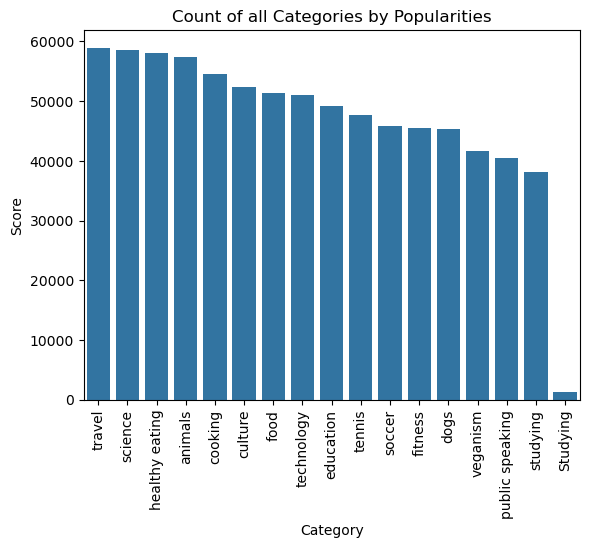

In [73]:
sns.barplot(data=sorted_df, x='Category', y='Score', color=color)
plt.xticks(rotation=90)
plt.title('Count of all Categories by Popularities');

##### From above, we can see what our highest 5 categories would be, but still, let us print them out, properly

In [74]:
sorted_df.head()

,Category,Score
1,travel,58946
2,science,58566
3,healthy eating,58059
4,animals,57418
5,cooking,54534


In [75]:
top5df=sorted_df.head()

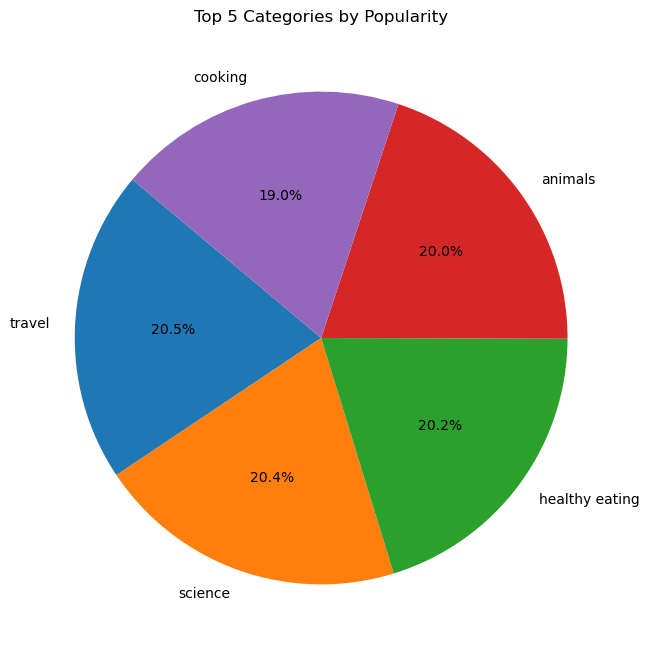

In [79]:
plt.figure(figsize=(8, 8))
plt.pie(top5df['Score'], labels=top5df['Category'], startangle=140, autopct='%1.1f%%')
plt.title('Top 5 Categories by Popularity')
plt.show()

In [77]:
#Saving our cleaned data 
sorted_df.to_csv('Cleaneddf.csv', index=False, encoding='UTF-8')

In [78]:
top5df.to_csv('Top5df', index=False, encoding='UTF-8')

In [81]:
top5df

,Category,Score
1,travel,58946
2,science,58566
3,healthy eating,58059
4,animals,57418
5,cooking,54534


<Axes: xlabel='Category', ylabel='Score'>

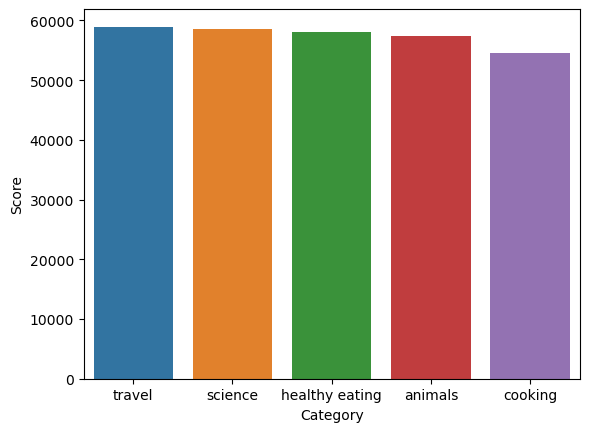

In [83]:
sns.barplot(data=top5df, x='Category', y='Score')